In [132]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [133]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score

In [134]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Admission_Predict_Ver1.1.csv').set_index('Serial No.')

In [135]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


In [136]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [137]:
df = df.rename(columns={'Chance of Admit ':'Chance of Admit',
                        'LOR ':'LOR'})

In [138]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [139]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [140]:
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']


In [141]:
print(X.shape)
print(y.shape)

(500, 7)
(500,)


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                             test_size=0.20,
                                             random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [143]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
X_test[0]

array([1.57660363, 1.42427137, 0.7754586 , 0.63397891, 0.02173015,
       1.59721688, 0.89543386])

In [145]:
xgbr = XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [146]:
xgbr.fit(X_train,y_train)
training_score = xgbr.score(X_train,y_train)
print('Training Score:',training_score)

Training Score: 0.999673618407897


In [147]:
cv_score = cross_val_score(xgbr, X_train, y_train, cv=10)
print('CV mean score:',cv_score.mean())

CV mean score: 0.7401209721206208


In [148]:
from sklearn.metrics import mean_squared_error
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test,ypred)
print('MSE',mse)
print('RMSE', mse*(1/2))

MSE 0.005180152550396941
RMSE 0.0025900762751984705


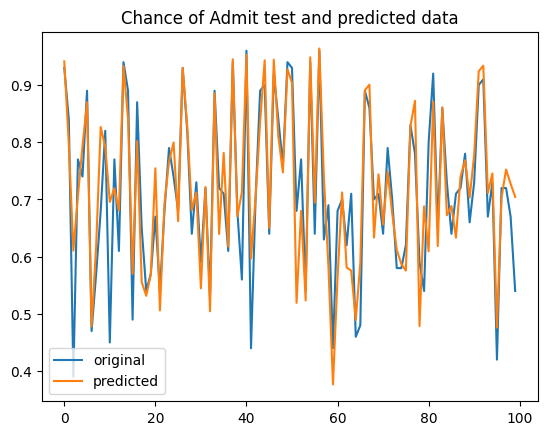

In [149]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label='original')
plt.plot(x_ax, ypred, label='predicted')
plt.title('Chance of Admit test and predicted data')
plt.legend()
plt.show()

In [150]:
import pickle

filename = 'XGBRegressor.pkl'
with open(filename,'wb') as file:
  pickle.dump(xgbr,file)

In [151]:
with open('XGBRegressor.pkl','rb') as file:
  loaded_model = pickle.load(file)